### Libraries

In [126]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.constants as cs
import scipy
from scipy import signal
from scipy.linalg import toeplitz
from cmath import phase
import matplotlib.colors as mcolors

### Inputs

In [127]:
# inputs
n_k = 201     # number of k points in BZ
n_max = 5  # max number of reciprocal lattive vectors
a= 5*10**(-10)  # lattice constant
g = 2.0*np.pi / a # reciprocal lattice unit vector
k_values = np.linspace(-g/2,g/2,n_k) # sampled k values in reciprocal space
M = cs.m_e      # mass of the electron
dim = 256      # number sampling points in real space of for the periodic potential
x=np.linspace(-a/2,a/2,dim)  # x points of unit cell in real space
dx = x[1]-x[0]
V_max = 5.0 # potential amplitude
fill_fraction = 0.5 # fill fraction of the potential

### Periodic potential function

In [128]:
def square(x_arr, fill_f, V_maximum):
	dim_x = np.shape(x_arr)[0]
	V = np.zeros(dim_x)
	V[0:int(dim_x*fill_f)] = V_maximum
	return V

In [129]:
V = square(x,fill_fraction, V_max)

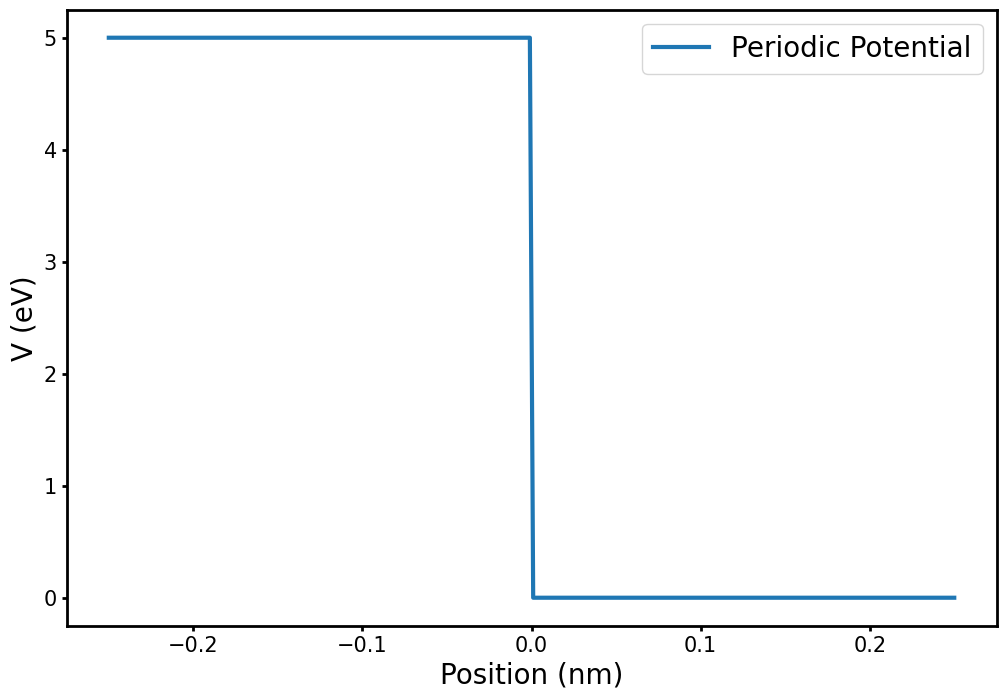

In [130]:
fig, ax = plt.subplots(figsize=(12,8))
f_size = 20
ax.plot(x*1e9,V, label='Periodic Potential',linewidth=3.0)

# labels
ax.set_xlabel('Position (nm)', fontsize=f_size)
ax.set_ylabel('V (eV)', fontsize=f_size)

# ticks
ax.tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    ax.spines[side].set(lw=2.0)

# legend
ax.legend(fontsize=f_size)

### Full Fast Fourier Transform

In [131]:
V_fft = np.fft.fft(V,norm='forward')  # compute full fft
V_fft_shift = np.fft.fftshift(V_fft)  # shift fft
k_fft = np.fft.fftshift(np.fft.fftfreq(len(V),dx*1e9))  # compute spatial fft frequencies

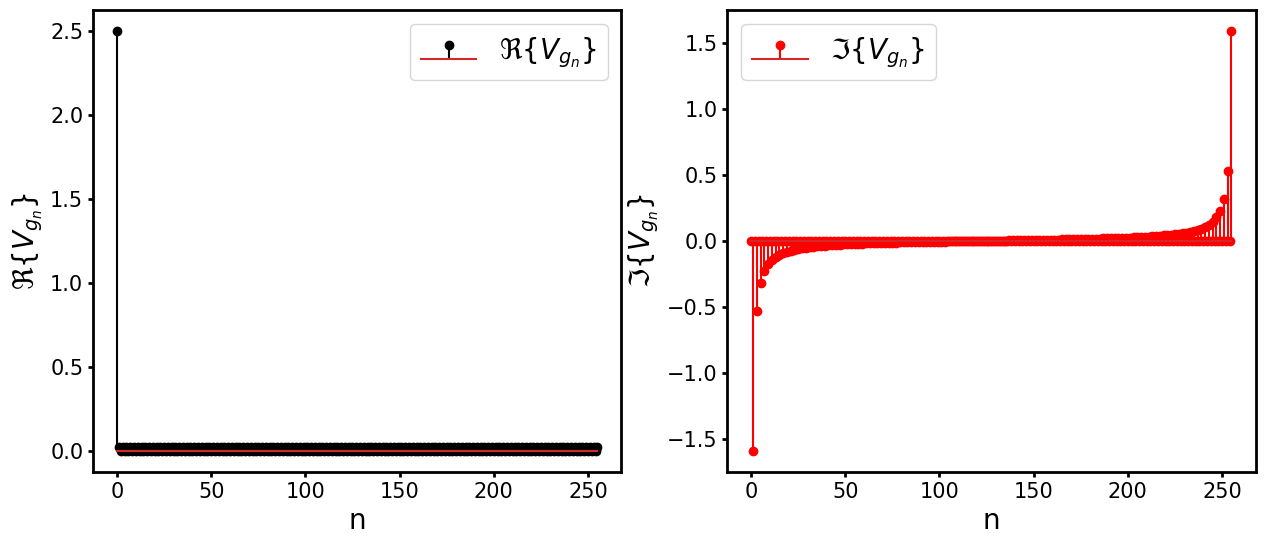

In [132]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
f_size = 20

# ------- real part ---------
axs[0].stem(V_fft.real,'k', label=r'$\Re\{V_{g_{n}}\}$')

# labels
axs[0].set_xlabel('n', fontsize=f_size)
axs[0].set_ylabel(r'$\Re\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[0].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[side].set(lw=2.0)

# legend
axs[0].legend(fontsize=f_size)

# ------- imaginary part ---------
axs[1].stem(V_fft.imag,'r', label=r'$\Im\{V_{g_{n}}\}$')

# labels
axs[1].set_xlabel('n', fontsize=f_size)
axs[1].set_ylabel(r'$\Im\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[1].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[side].set(lw=2.0)

# legend
axs[1].legend(fontsize=f_size)

(96.0, 160.0)

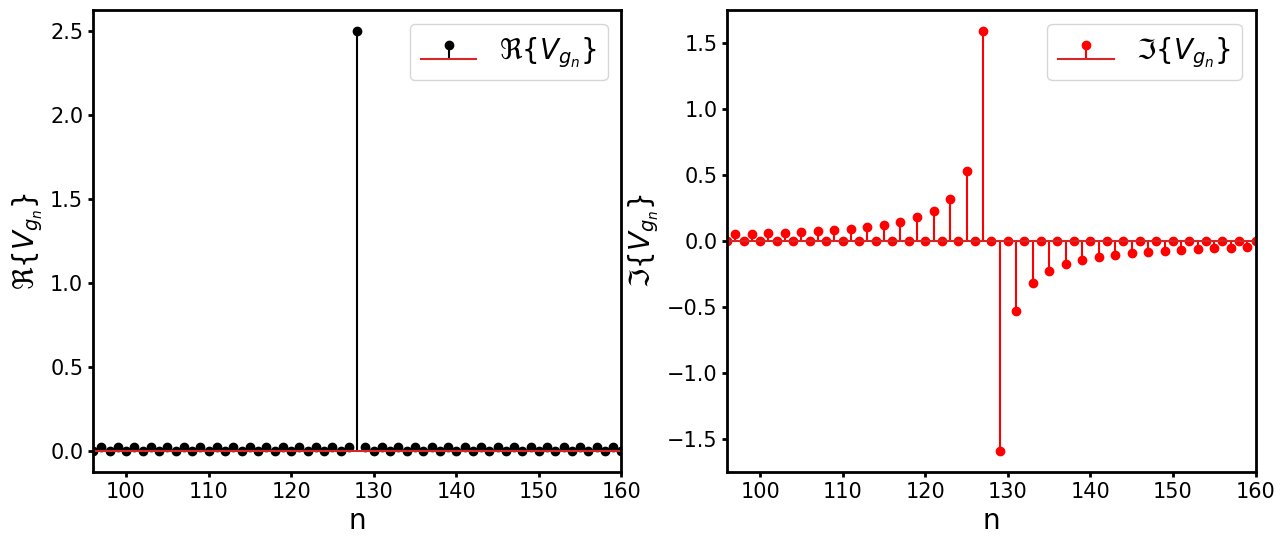

In [133]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
f_size = 20

# ------- real part ---------
axs[0].stem(V_fft_shift.real,'k', label=r'$\Re\{V_{g_{n}}\}$')

# labels
axs[0].set_xlabel('n', fontsize=f_size)
axs[0].set_ylabel(r'$\Re\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[0].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[side].set(lw=2.0)

# legend
axs[0].legend(fontsize=f_size)

# limits
axs[0].set_xlim(dim//2-32,dim//2+32)

# ------- imaginary part ---------
axs[1].stem(V_fft_shift.imag,'r', label=r'$\Im\{V_{g_{n}}\}$')

# labels
axs[1].set_xlabel('n', fontsize=f_size)
axs[1].set_ylabel(r'$\Im\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[1].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[side].set(lw=2.0)

# legend
axs[1].legend(fontsize=f_size)

# limits
axs[1].set_xlim(dim//2-32,dim//2+32)

(-64.0, 64.0)

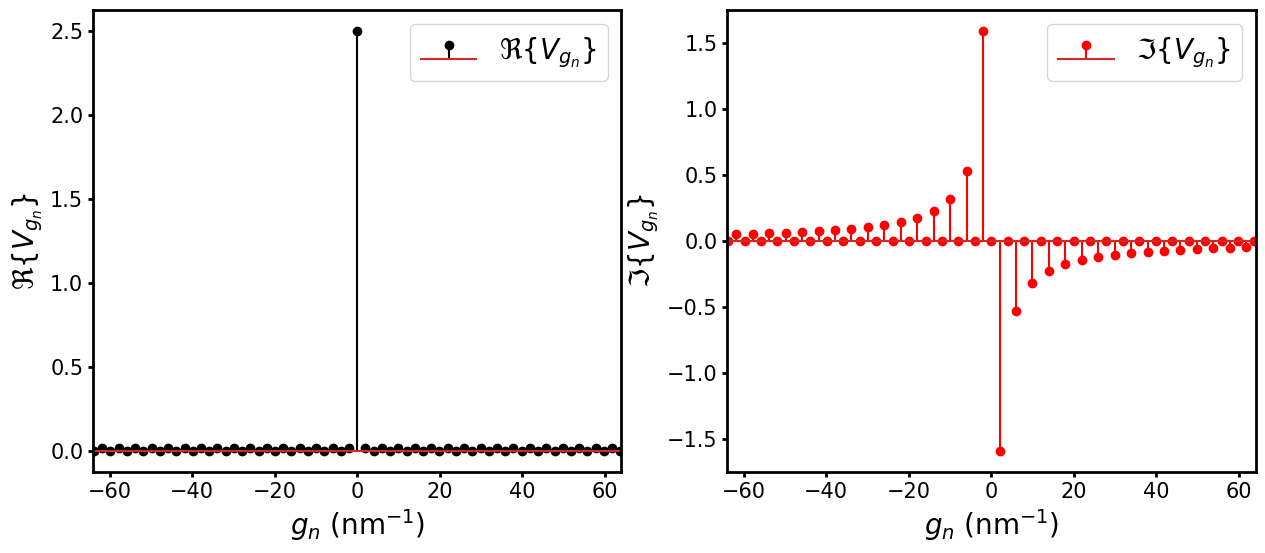

In [134]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
f_size = 20

# ------- real part ---------
axs[0].stem(k_fft,V_fft_shift.real,'k', label=r'$\Re\{V_{g_{n}}\}$')

# labels
axs[0].set_xlabel('$g_{n}$ (nm$^{-1}$)', fontsize=f_size)
axs[0].set_ylabel(r'$\Re\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[0].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[side].set(lw=2.0)

# legend
axs[0].legend(fontsize=f_size)

# limits
axs[0].set_xlim(-32/(a*1e9),32/(a*1e9))

# ------- imaginary part ---------
axs[1].stem(k_fft,V_fft_shift.imag,'r', label=r'$\Im\{V_{g_{n}}\}$')

# labels
axs[1].set_xlabel('$g_{n}$ (nm$^{-1}$)', fontsize=f_size)
axs[1].set_ylabel(r'$\Im\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[1].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[side].set(lw=2.0)

# legend
axs[1].legend(fontsize=f_size)

# limits
axs[1].set_xlim(-32/(a*1e9),32/(a*1e9))

### Real Fast Fourier Transform

In [135]:
V_fft_r = np.fft.rfft(V,norm='forward')  # compute fft
k_fft_r = np.fft.rfftfreq(len(V),dx*1e9)  # compute fft spatial frequencies

(-2.0, 128.0)

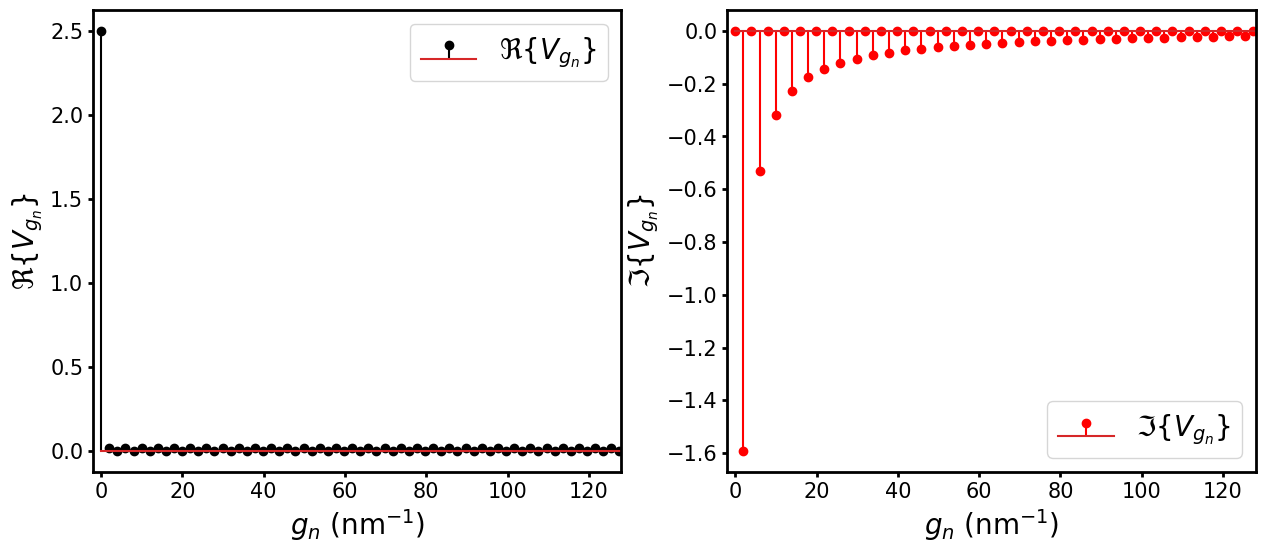

In [136]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
f_size = 20

# ------- real part ---------
axs[0].stem(k_fft_r,V_fft_r.real,'k', label=r'$\Re\{V_{g_{n}}\}$')

# labels
axs[0].set_xlabel('$g_{n}$ (nm$^{-1}$)', fontsize=f_size)
axs[0].set_ylabel(r'$\Re\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[0].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[side].set(lw=2.0)

# legend
axs[0].legend(fontsize=f_size)

# limits
axs[0].set_xlim(-1/(a*1e9),64/(a*1e9))

# ------- imaginary part ---------
axs[1].stem(k_fft_r,V_fft_r.imag,'r', label=r'$\Im\{V_{g_{n}}\}$')

# labels
axs[1].set_xlabel('$g_{n}$ (nm$^{-1}$)', fontsize=f_size)
axs[1].set_ylabel(r'$\Im\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[1].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[side].set(lw=2.0)

# legend
axs[1].legend(fontsize=f_size)

# limits
axs[1].set_xlim(-1/(a*1e9),64/(a*1e9))

In [137]:
V_fft_r_zero = V_fft_r
V_fft_r_zero[2*n_max+1:]=0

(-2.0, 128.0)

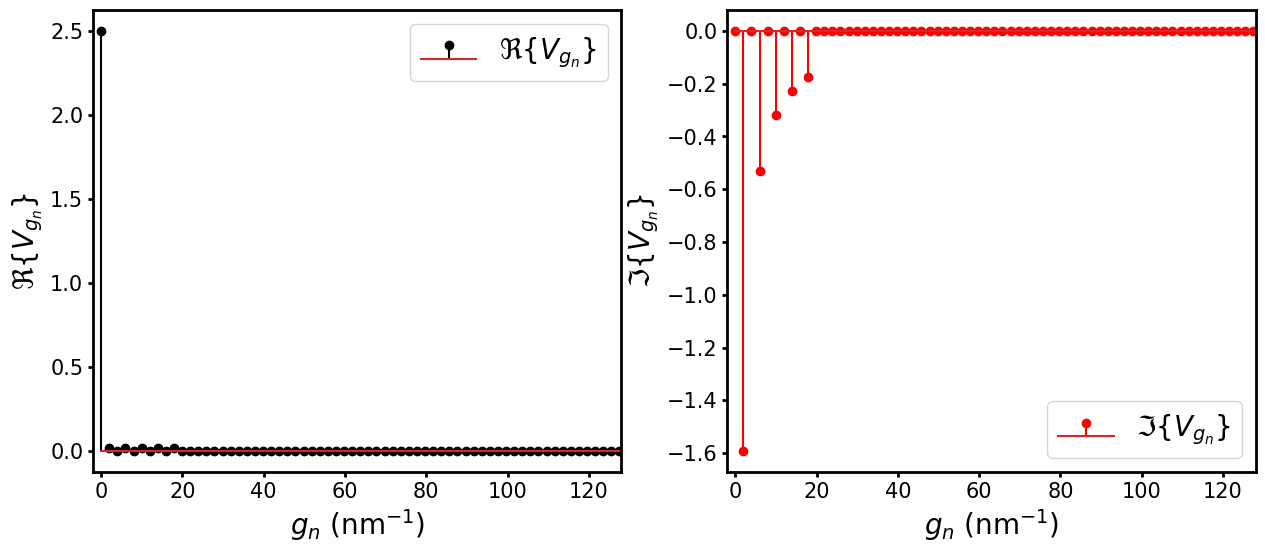

In [138]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
f_size = 20

# ------- real part ---------
axs[0].stem(k_fft_r,V_fft_r_zero.real,'k', label=r'$\Re\{V_{g_{n}}\}$')

# labels
axs[0].set_xlabel('$g_{n}$ (nm$^{-1}$)', fontsize=f_size)
axs[0].set_ylabel(r'$\Re\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[0].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[0].spines[side].set(lw=2.0)

# legend
axs[0].legend(fontsize=f_size)

# limits
axs[0].set_xlim(-1/(a*1e9),64/(a*1e9))

# ------- imaginary part ---------
axs[1].stem(k_fft_r,V_fft_r_zero.imag,'r', label=r'$\Im\{V_{g_{n}}\}$')

# labels
axs[1].set_xlabel('$g_{n}$ (nm$^{-1}$)', fontsize=f_size)
axs[1].set_ylabel(r'$\Im\{V_{g_{n}}\}$', fontsize=f_size)

# ticks
axs[1].tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    axs[1].spines[side].set(lw=2.0)

# legend
axs[1].legend(fontsize=f_size)

# limits
axs[1].set_xlim(-1/(a*1e9),64/(a*1e9))

### Reconstruct the potential

In [139]:
def fft_V(V,n_max):
	"""Calculates the truncated real-valued Fast Fourier Transform (FFT) of a potential.

	Args:
	V (numpy.ndarray): The input signal to be transformed.
	n_max (int): The number of FFT coefficients to retain.

	Returns:
	numpy.ndarray: The truncated real-valued FFT of the input potential,
				   with only the first 2*n_max coefficients preserved.
	"""
	V_fft = np.fft.rfft(V,norm='forward')
	V_fft[2*n_max+1:] = 0.0
	return V_fft

def ifft_V(V_fft):
	"""
	Computes the inverse Fourier transform of a real-valued potential.

	Args:
	V_fft (numpy.ndarray): The input array containing the Fourier
							transform coefficients of the potential.

	Returns:
	numpy.ndarray: The reconstructed real-valued signal.
	"""
	V_recon = np.fft.irfft(V_fft,norm='forward')
	return V_recon

In [140]:
V_fft = fft_V(V,n_max)
V_recon = ifft_V(V_fft)

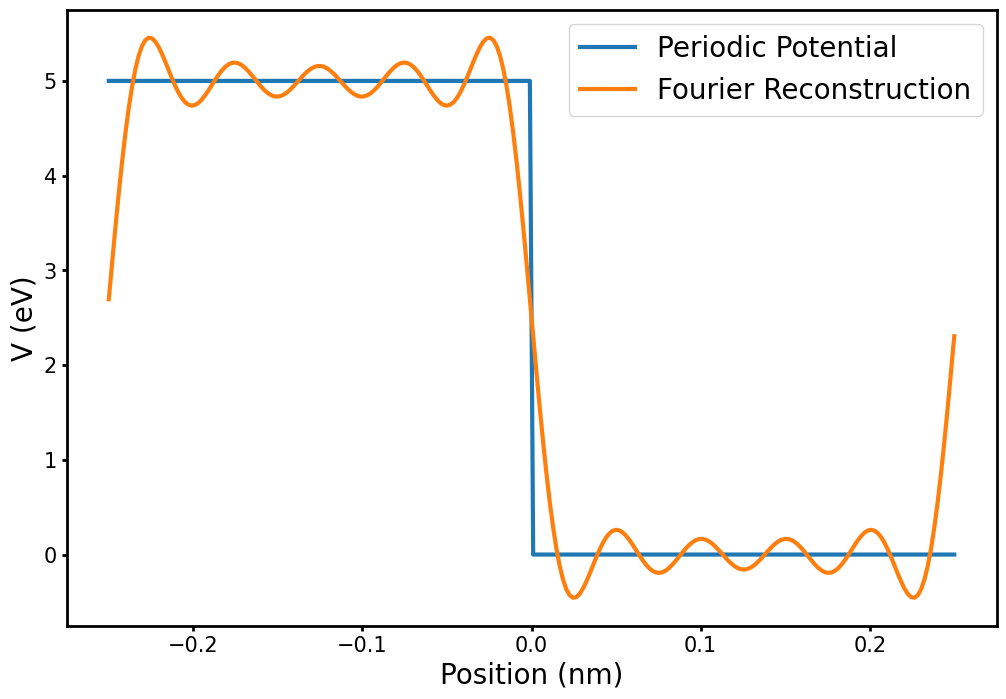

In [142]:
fig, ax = plt.subplots(figsize=(12,8))
f_size = 20
ax.plot(x*1e9,V, label='Periodic Potential',linewidth=3.0)
ax.plot(x*1e9,V_recon, label='Fourier Reconstruction',linewidth=3.0)

# labels
ax.set_xlabel('Position (nm)', fontsize=f_size)
ax.set_ylabel('V (eV)', fontsize=f_size)

# ticks
ax.tick_params(labelsize=f_size-5,width=2.0)

# spine widths
for side in ['top', 'bottom', 'left', 'right']:
    ax.spines[side].set(lw=2.0)

# legend
ax.legend(fontsize=f_size)